### Instaling Libries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow ultralytics


### Download YOLOv8 model

In [17]:
from ultralytics import YOLO

model = YOLO("yolov8m")

100%|██████████| 49.7M/49.7M [00:00<00:00, 190MB/s]


### Get Data From Roboflow Universe API

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="enter your api")
project = rf.workspace("toto-fj9hq").project("egyptian-license-plate-recognition-in-vehicles-and-motorcycles")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.92, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Egyptian-License-Plate-recognition-in-vehicles-and-motorcycles-1 in yolov8:: 100%|██████████| 609/609 [00:00<00:00, 709.50it/s]


In [18]:
!yolo help


    Arguments received: ['yolo', 'help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/Zgi9g1ksQHc' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco128.yaml batch=1 imgs

In [19]:
!yolo cfg

Printing '/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/default.yaml'

task: detect
mode: train
model: null
data: null
epochs: 100
patience: 50
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: null
exist_ok: false
pretrained: false
optimizer: SGD
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 0
resume: false
amp: true
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
show: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
vid_stride: 1
line_width: null
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
boxes: true
format: torchscript
keras: false
optimize: false
int8: false
dynamic: false
simplify: false
opset: null
workspace: 4
nms: false
lr0: 0.01
lrf: 0.01

### Train the Model

In [ ]:
!yolo task=segment dnn=True batch=32 mode=train  epochs=50 show=True model=/content/yolov8m.pt epochs=25 imgsz=640 data={dataset.location}/data.yaml # optimizer=adam

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8m.pt, data=/content/Egyptian-License-Plate-recognition-in-vehicles-and-motorcycles-1/data.yaml, epochs=25, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=True, plots=True, source=None, show=True, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thi

In [27]:
from IPython.display import Image, display


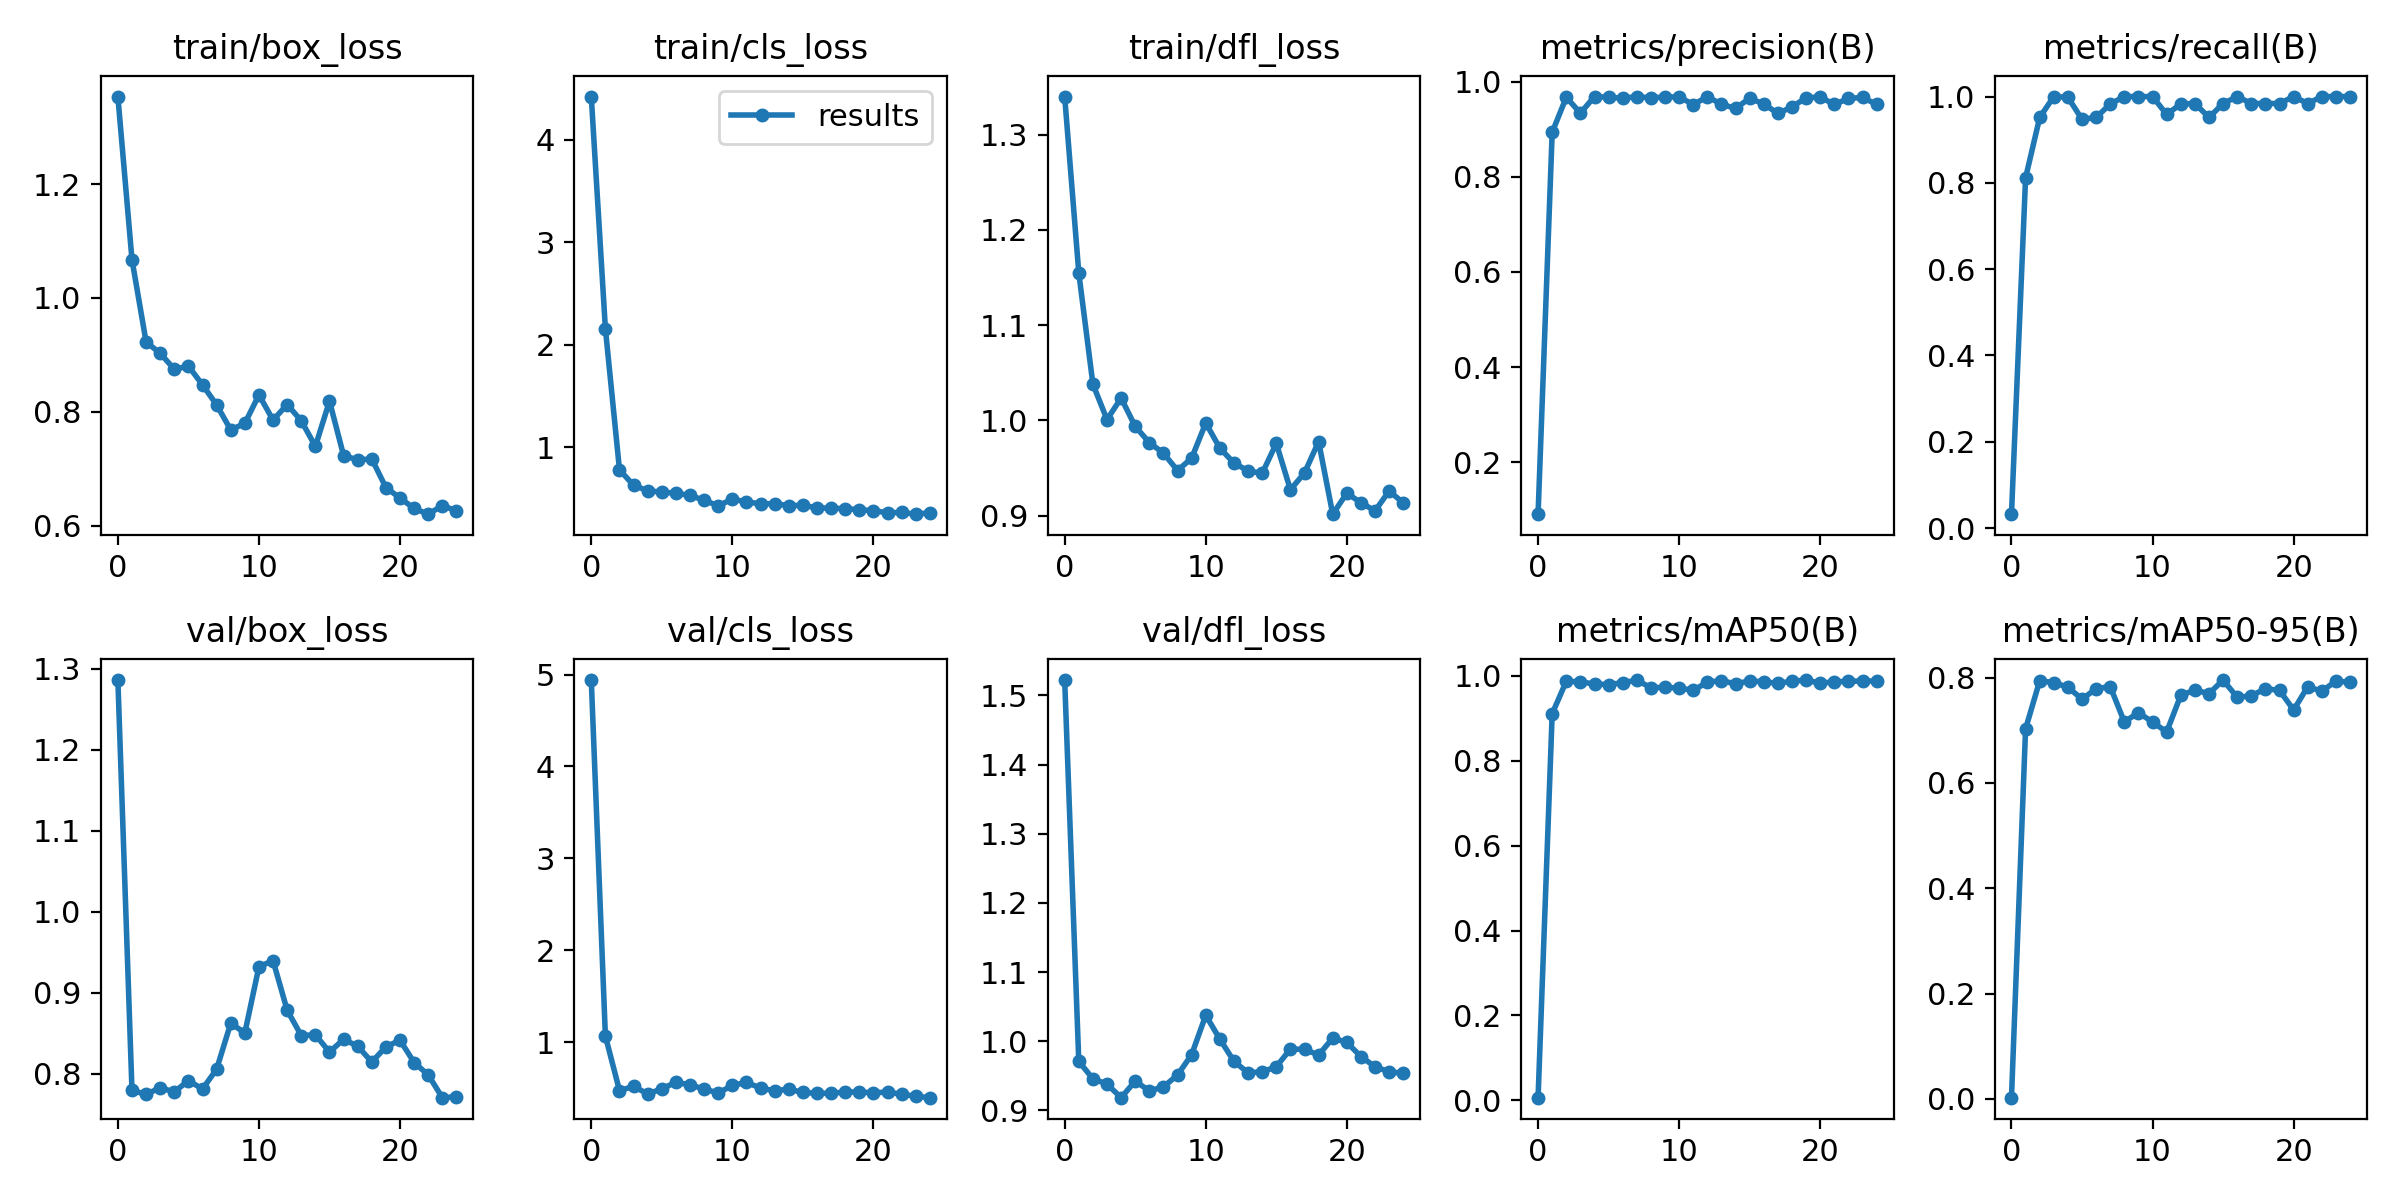

In [4]:
Image(filename='/content/detect/train/results.png', width=600)
# Image(filename=f'/content/runs/segment/train6/confusion_matrix.png', width=600)


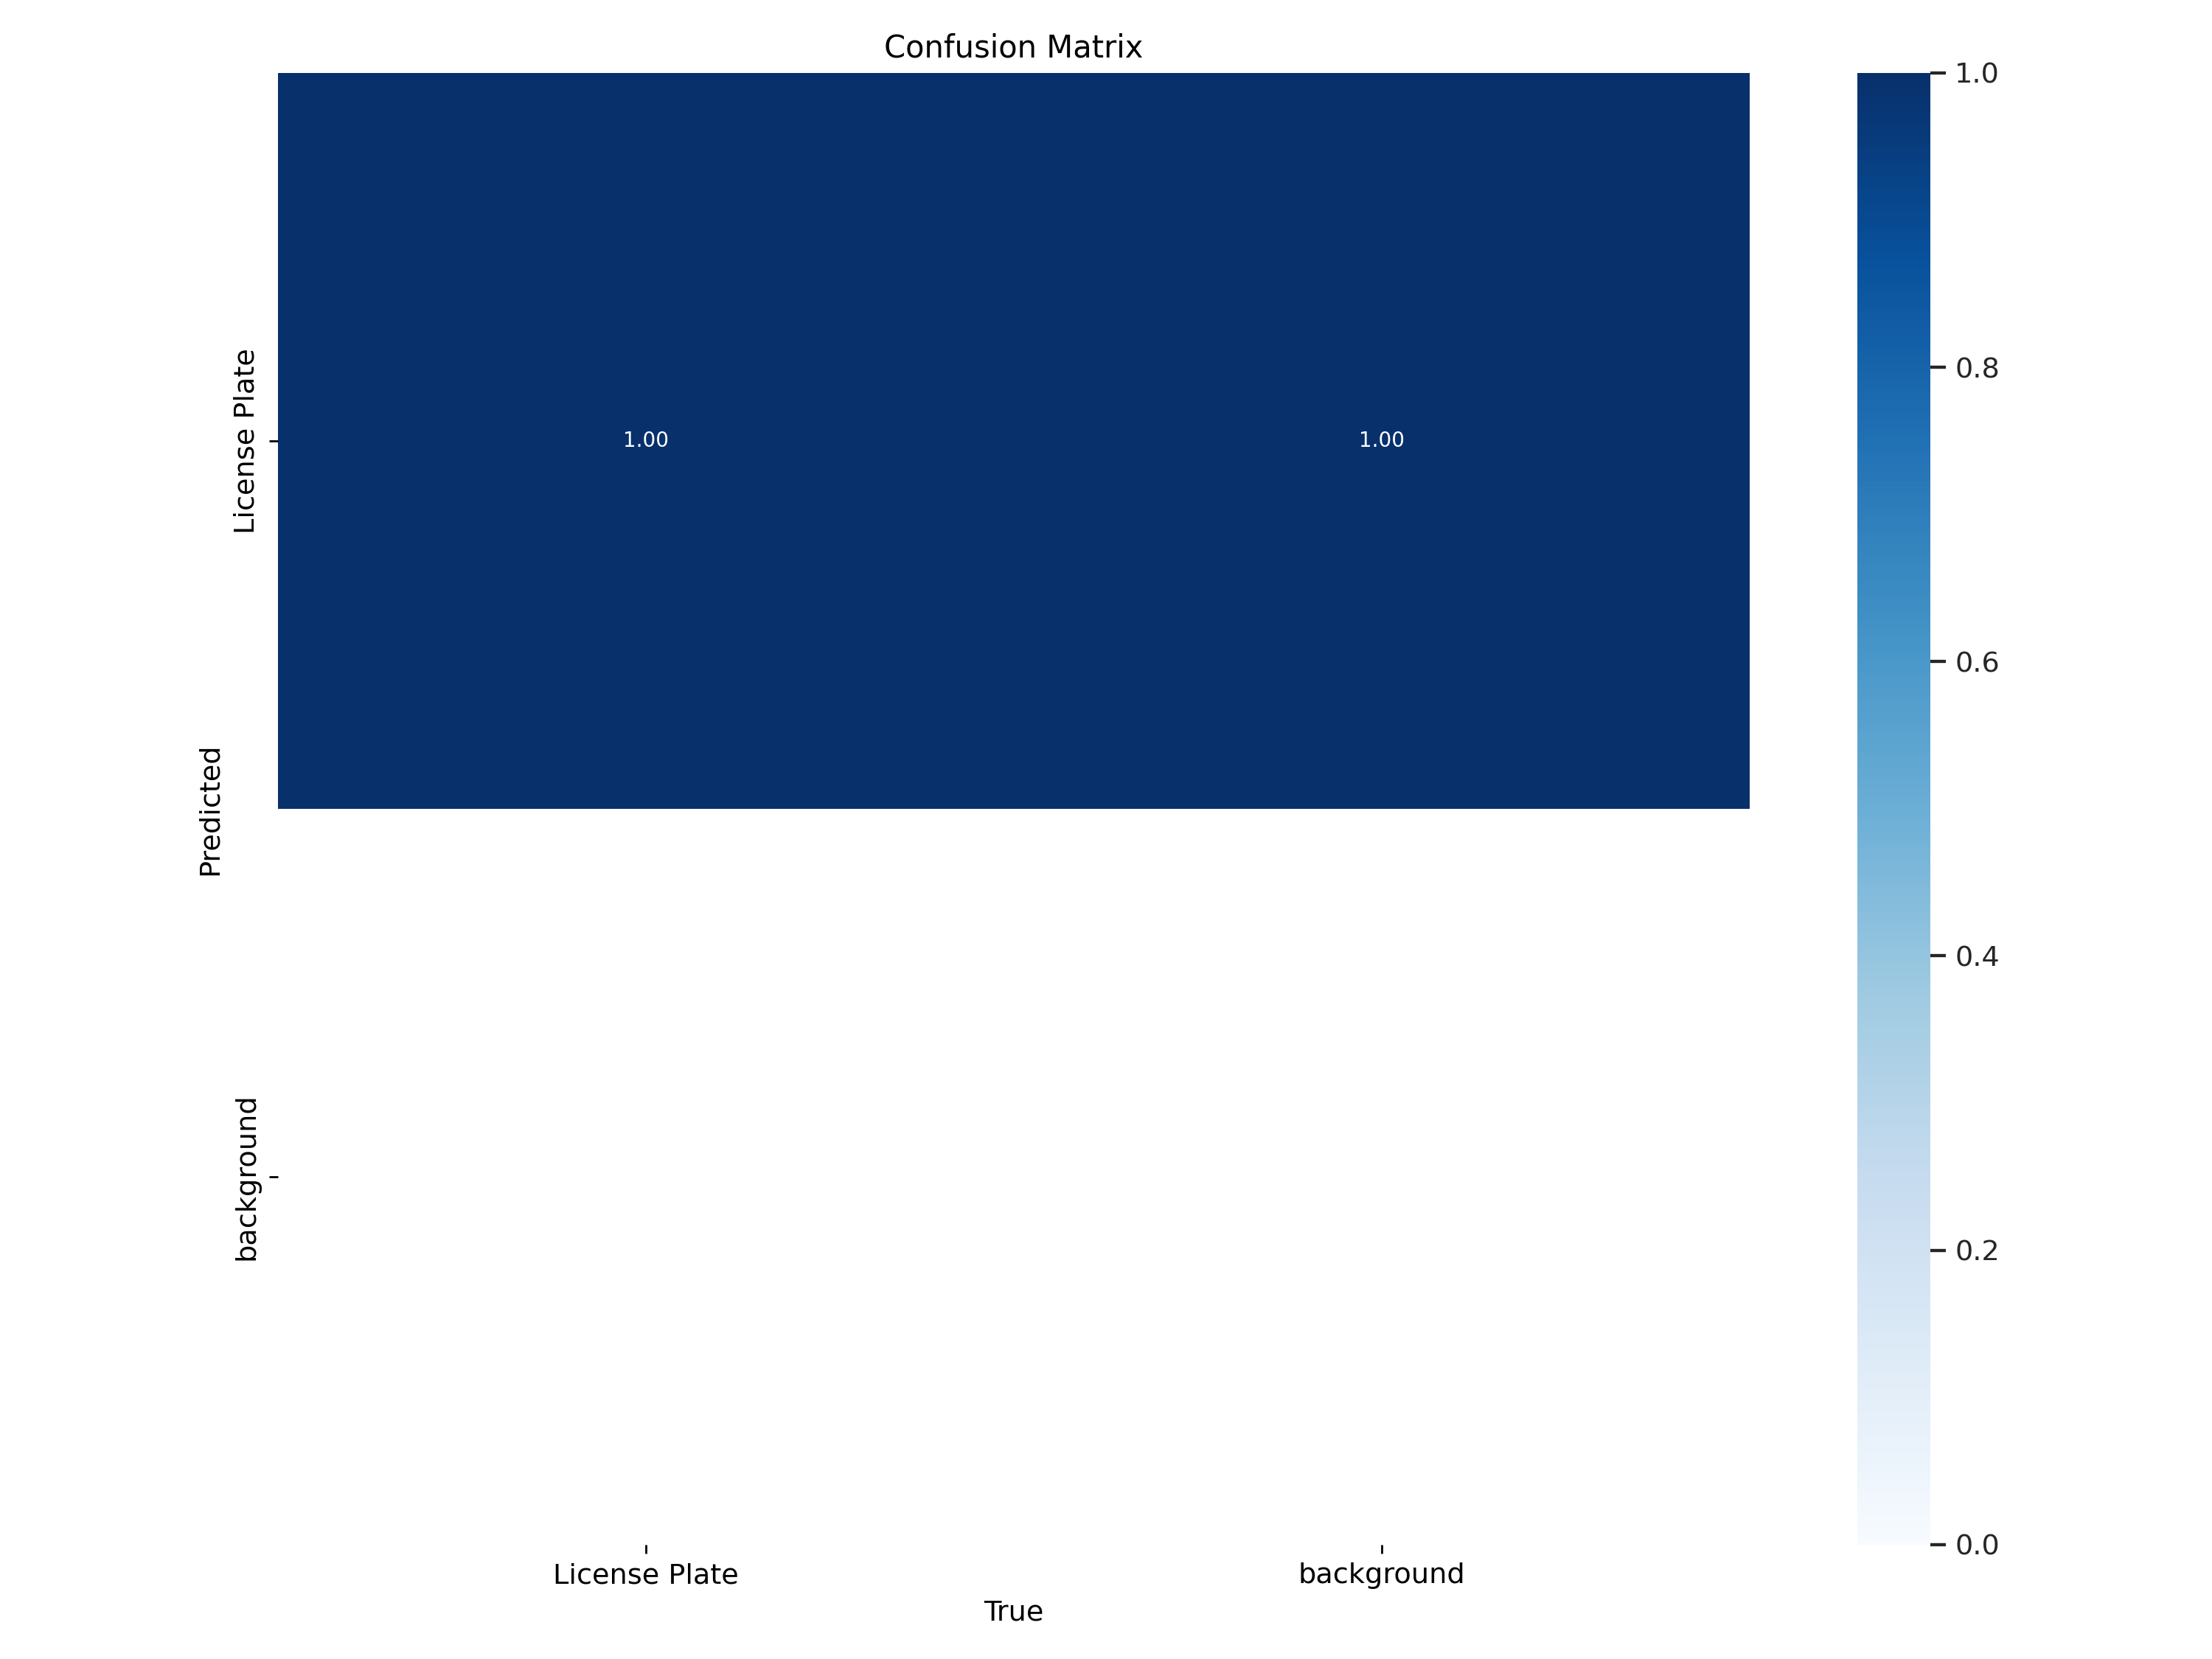

In [9]:
# Image(filename=f'/content/runs/segment/train6/confusion_matrix.png', width=600)
Image(filename='/content/detect/train/confusion_matrix.png', width=600)

### Model Prediction on Validation data

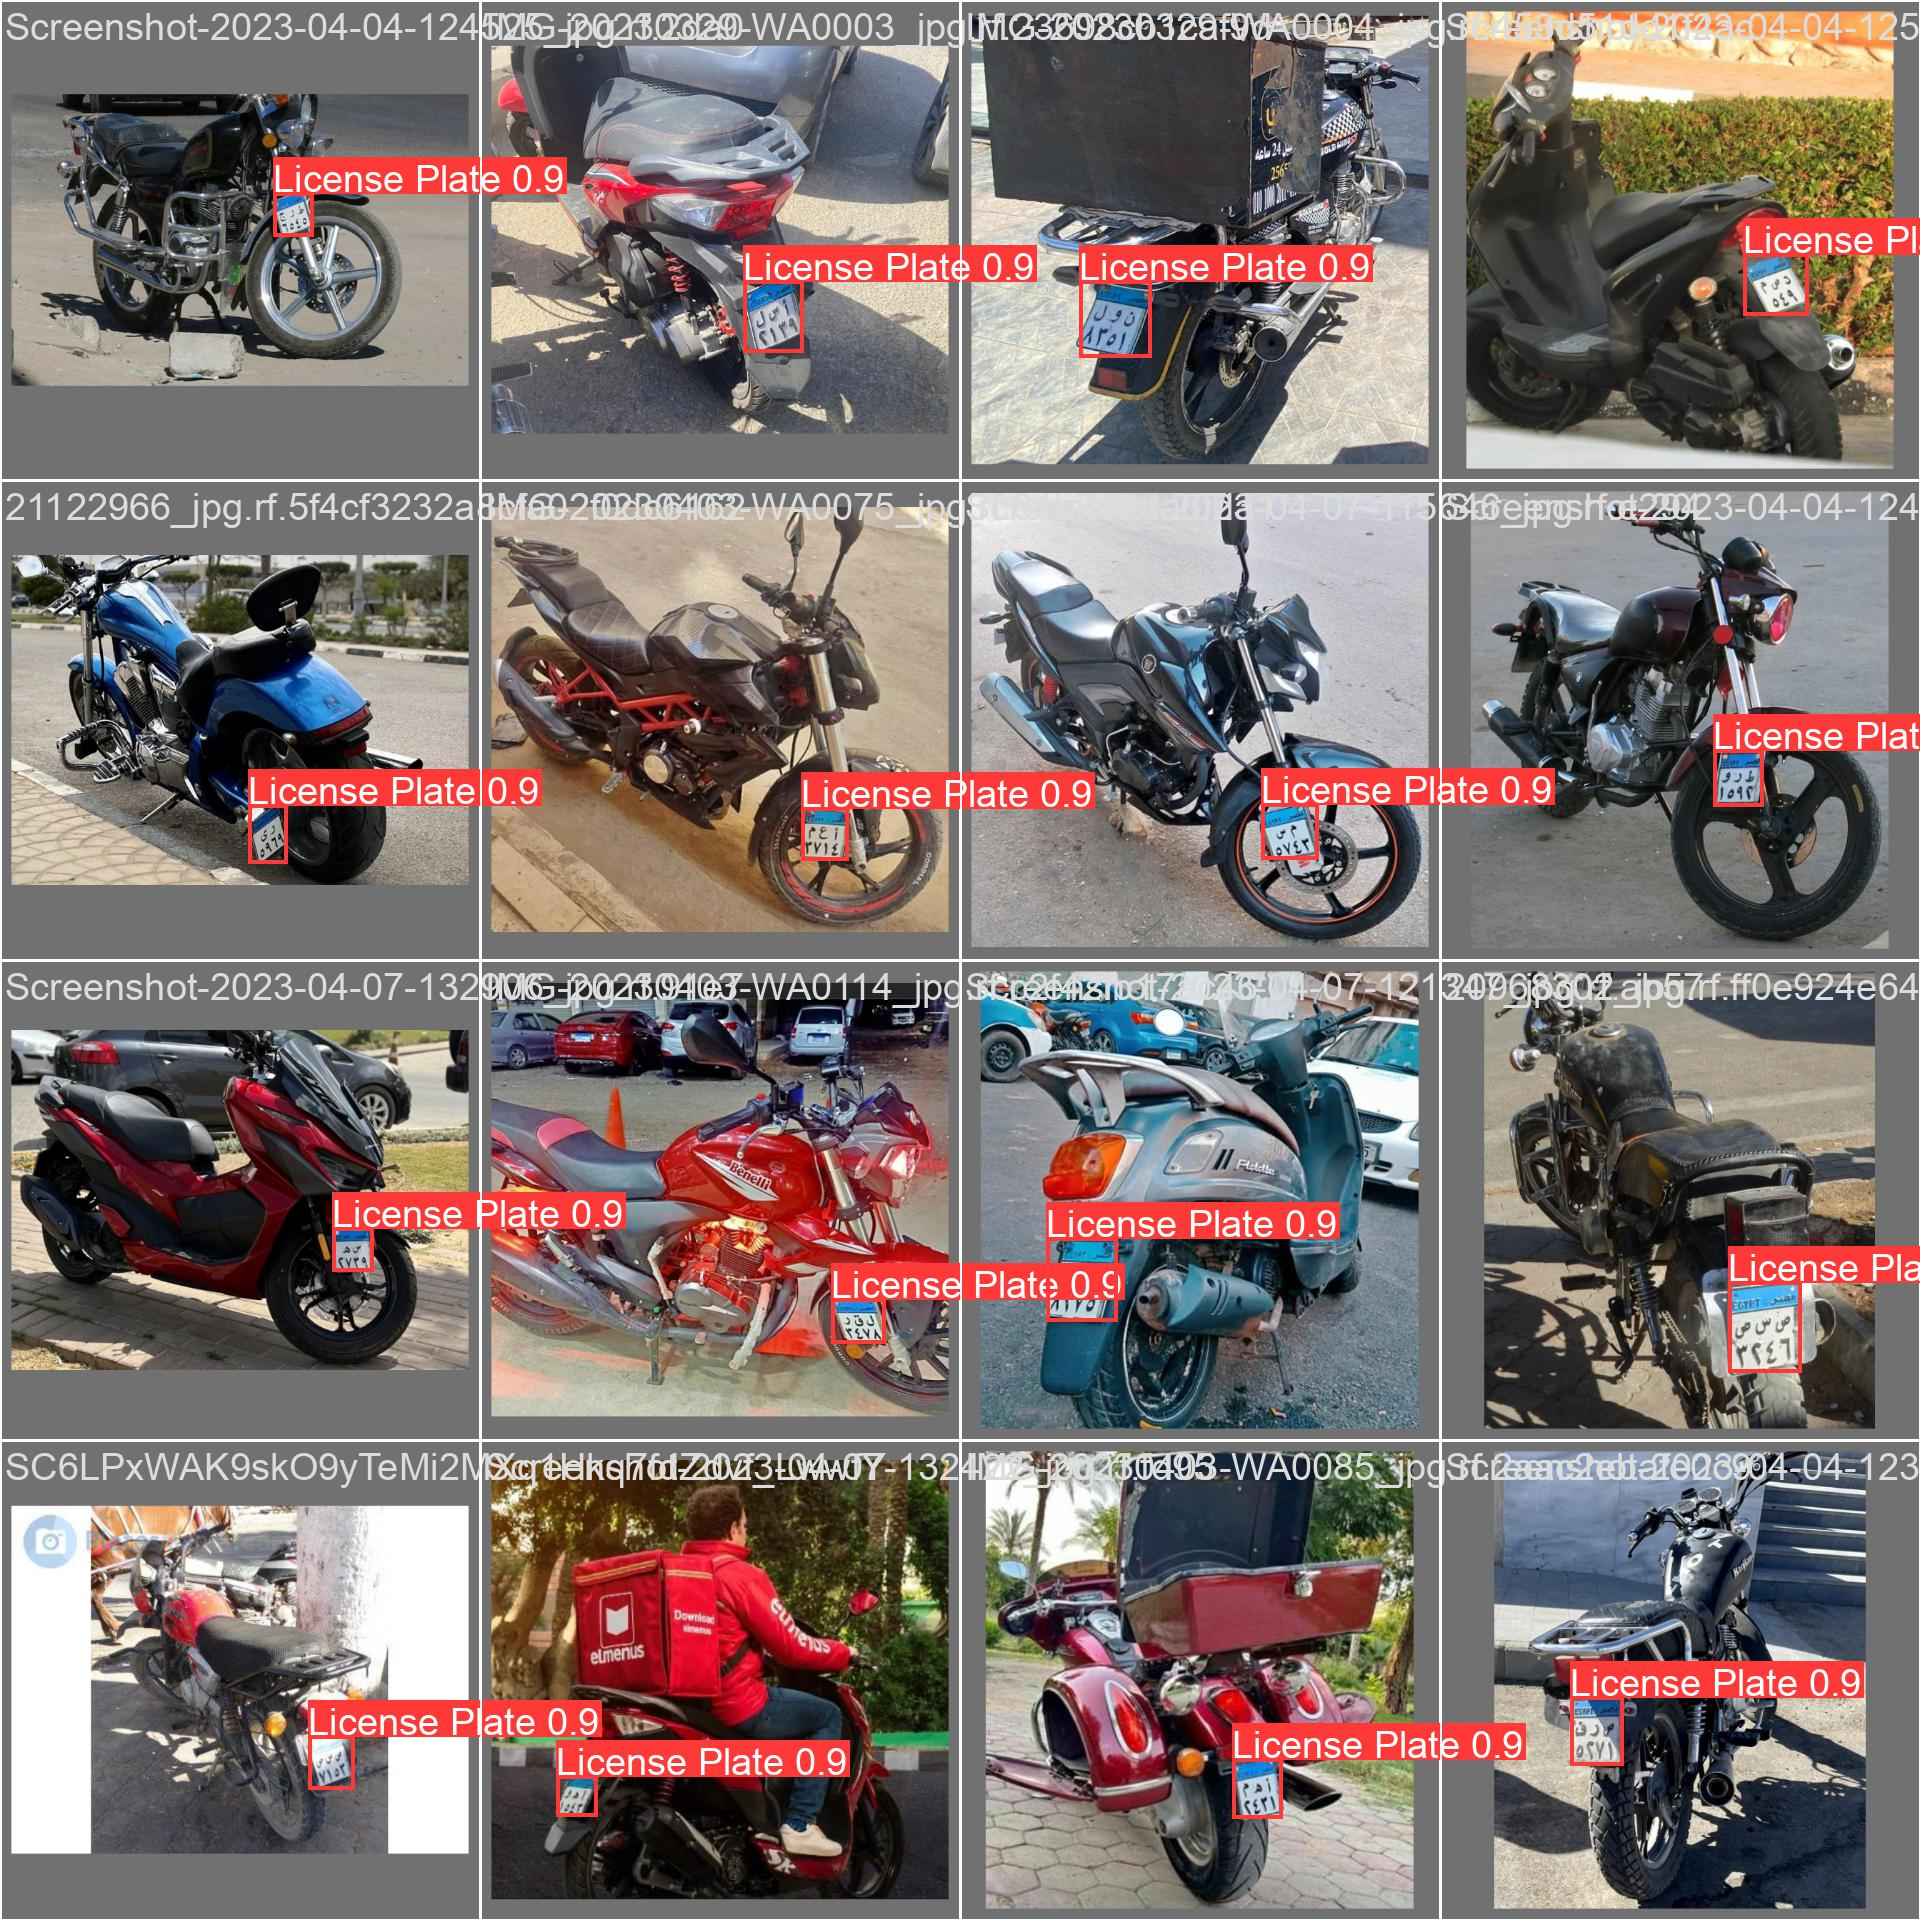

In [7]:
Image(filename='/content/detect/train/val_batch0_pred.jpg', width=600)


### Model Prediection on custom Data

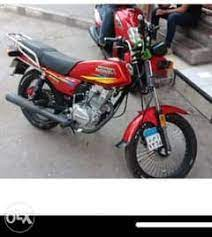

In [29]:
Image(filename='/content/12.jpeg', width=400)

In [36]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/model/detect/train/weights/best.pt conf=0.5 show=True source='/content/12.jpeg'

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/12.jpeg: 640x576 1 License Plate, 1552.4ms
Speed: 6.2ms preprocess, 1552.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


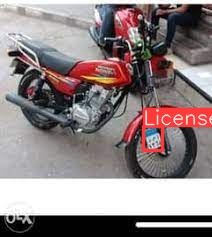

In [31]:
Image(filename='/content/runs/detect/predict3/12.jpeg', width=400)

### Test model on image without Plate

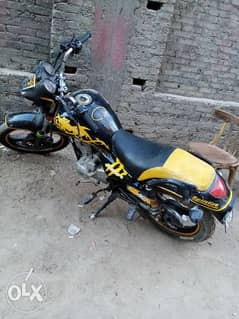

In [34]:
Image(filename='/content/13.jpeg', width=400)

In [22]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/model/detect/train/weights/best.pt conf=0.5 show=True source='/content/13.jpeg'

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/13.jpeg: 640x480 (no detections), 1246.2ms
Speed: 9.2ms preprocess, 1246.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


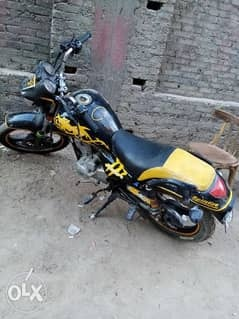

In [35]:
Image(filename='/content/runs/detect/predict2/13.jpeg', width=400)